In [24]:
import os
from os.path import join
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [2]:
ephys_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/MacaqueITBench/processed_sessions_v3"
stim_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/MacaqueITBench/Images"

In [3]:
glob(join(ephys_root, "**", "*.pkl"), recursive=True)

'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/MacaqueITBench/processed_sessions_v3'

In [9]:
session_list = sorted([d for d in glob(join(ephys_root, "*")) \
                            if not d.endswith("middle_layers")])
session_names = sorted([d.split("/")[-1] for d in session_list])

In [26]:
for session_name in session_names[2:]:
    print(session_name)
    images = pkl.load(open(join(ephys_root, session_name, "session_images.p"), "rb"))
    session_responses = pkl.load(open(join(ephys_root, session_name, "session_responses.p"), "rb"))
    all_responses = pkl.load(open(join(ephys_root, session_name, "im_to_all_responses.p"), "rb"))
    averaged_responses = pkl.load(open(join(ephys_root, session_name, "im_to_averaged_response.p"), "rb"))
    self_consistency = pkl.load(open(join(ephys_root, session_name, "self_consistency.p"), "rb"))
    print(type(images), len(images))
    print(type(self_consistency), self_consistency.shape)
    print(type(session_responses), session_responses.shape)
    print(type(all_responses), len(all_responses))
    print(type(averaged_responses), len(averaged_responses))
    missing_images = []
    for img_path in images:
        img_fname = img_path.split("/")[-1]
        full_path = join(stim_root, img_fname)
        exists = os.path.exists(full_path)
        if not exists:
            print(f"{img_fname}: missing")
            missing_images.append(img_fname)
    print("total missing images: ", len(missing_images))
    break

Bo220319
<class 'list'> 2576
<class 'numpy.ndarray'> (64,)
<class 'numpy.ndarray'> (2576, 64)
<class 'dict'> 2576
<class 'dict'> 2576
06724575b4ed6dedf7e3ffd70ac221bf.jpg: missing
0d0eb5263b7e21cbf14712743d31c507.jpg: missing
249cd52b7ef187a0c6a4c1ef9843b755.jpg: missing
24ab418c070bf333d708e039e60dd865.jpg: missing
42e2521b6d9ed11c008e54466170b6c4.jpg: missing
4720be8cdfd0b86a7ca3c66434d85819.jpg: missing
52b40867c961abc1681eba6cfe917122.jpg: missing
5cd73b9788f1cad3b31b2750d93125d8.jpg: missing
5f904c48959c13f7048a0af99c82e779.jpg: missing
690f95b399cc8315a3302821f36c8c1c.jpg: missing
6a66d9ac47338a2e2de9d061f0620bed.jpg: missing
9b482dbea729227830cb092de46d9480.jpg: missing
af162e6a0e7928e56ee617e1c2d5a689.jpg: missing
af2ddebe10fc17d2cb7704ad5cca5b62.jpg: missing
aff1d84904ffe60793a739144bc9713d.jpg: missing
c5e71deb0f61d2cfbaea71a44dc831d6.jpg: missing
d1212cdb428e4a003d612fc435931307.jpg: missing
d60153730dedfd4a21ad2264e9dde39b.jpg: missing
db9f456ed613ff75aa6107f5774005e5.jpg: 

In [ ]:
missing_image_collection = {}
for session_name in session_names[:]:
    print(session_name)
    images = pkl.load(open(join(ephys_root, session_name, "session_images.p"), "rb"))
    session_responses = pkl.load(open(join(ephys_root, session_name, "session_responses.p"), "rb"))
    all_responses = pkl.load(open(join(ephys_root, session_name, "im_to_all_responses.p"), "rb"))
    averaged_responses = pkl.load(open(join(ephys_root, session_name, "im_to_averaged_response.p"), "rb"))
    self_consistency = pkl.load(open(join(ephys_root, session_name, "self_consistency.p"), "rb"))
    print(type(images), len(images))
    print(type(self_consistency), self_consistency.shape)
    print(type(session_responses), session_responses.shape)
    print(type(all_responses), len(all_responses))
    print(type(averaged_responses), len(averaged_responses))
    missing_images = []
    for img_path in images:
        img_fname = img_path.split("/")[-1]
        full_path = join(stim_root, img_fname)
        # note some suffix is using JPG not jpg
        exists = os.path.exists(full_path)
        if not exists:
            # print(f"{img_fname}: missing")
            missing_images.append(img_fname)
    print("total missing images: ", len(missing_images))
    missing_image_collection[session_name] = missing_images
    
uniques = set(sum(missing_image_collection.values(), []))
print("total unique missing images: ", len(uniques))

In [32]:
uniques = set(sum(missing_image_collection.values(), []))
len(uniques)

58

### Check shape and missing images

In [40]:
missing_image_collection = {}
for session_name in session_names[:]:
    print(session_name)
    images = pkl.load(open(join(ephys_root, session_name, "session_images.p"), "rb"))
    session_responses = pkl.load(open(join(ephys_root, session_name, "session_responses.p"), "rb"))
    all_responses = pkl.load(open(join(ephys_root, session_name, "im_to_all_responses.p"), "rb"))
    averaged_responses = pkl.load(open(join(ephys_root, session_name, "im_to_averaged_response.p"), "rb"))
    self_consistency = pkl.load(open(join(ephys_root, session_name, "self_consistency.p"), "rb"))
    print(type(images), len(images))
    print(type(self_consistency), self_consistency.shape)
    print(type(session_responses), session_responses.shape)
    print(type(all_responses), len(all_responses))
    print(type(averaged_responses), len(averaged_responses))
    missing_images = []
    for img_path in images:
        img_fname = img_path.split("/")[-1]
        full_path = join(stim_root, img_fname)
        # note some suffix is using JPG not jpg
        exists = os.path.exists(full_path) or \
            os.path.exists(full_path.replace(".jpg", ".JPG"))
        if not exists:
            # print(f"{img_fname}: missing")
            missing_images.append(img_fname)
    print("total missing images: ", len(missing_images))
    missing_image_collection[session_name] = missing_images
    
uniques = set(sum(missing_image_collection.values(), []))
print("total unique missing images: ", len(uniques))

Bo220226
<class 'list'> 1250
<class 'numpy.ndarray'> (64,)
<class 'numpy.ndarray'> (1250, 64)
<class 'dict'> 1250
<class 'dict'> 1250
total missing images:  0
Bo220312
<class 'list'> 3126
<class 'numpy.ndarray'> (64,)
<class 'numpy.ndarray'> (3126, 64)
<class 'dict'> 3126
<class 'dict'> 3126
total missing images:  0
Bo220319
<class 'list'> 2576
<class 'numpy.ndarray'> (64,)
<class 'numpy.ndarray'> (2576, 64)
<class 'dict'> 2576
<class 'dict'> 2576
total missing images:  0
Bo220320
<class 'list'> 3539
<class 'numpy.ndarray'> (64,)
<class 'numpy.ndarray'> (3539, 64)
<class 'dict'> 3539
<class 'dict'> 3539
total missing images:  0
Bo220321
<class 'list'> 3813
<class 'numpy.ndarray'> (64,)
<class 'numpy.ndarray'> (3813, 64)
<class 'dict'> 3813
<class 'dict'> 3813
total missing images:  0
Bo220322
<class 'list'> 3300
<class 'numpy.ndarray'> (64,)
<class 'numpy.ndarray'> (3300, 64)
<class 'dict'> 3300
<class 'dict'> 3300
total missing images:  0
Bo220323
<class 'list'> 2767
<class 'numpy.nda

In [36]:
# Search for markdown and text files in the root directory
md_txt_files = []
for root, dirs, files in os.walk(ephys_root):
    for file in files:
        if file.endswith(('.md', '.txt')):
            md_txt_files.append(os.path.join(root, file))

print("Found markdown/text files:")
for file in md_txt_files:
    print(file)

Found markdown/text files:


In [38]:
# 06724575b4ed6dedf7e3ffd70ac221bf

files_to_check = []
for root, dirs, files in os.walk(stim_root):
    for file in files:
        if "06724575b4ed6dedf7e3ffd70ac221bf" in file:
            files_to_check.append(os.path.join(root, file))

print("Found markdown/text files:")
for file in files_to_check:
    print(file)

Found markdown/text files:
/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/MacaqueITBench/Images/06724575b4ed6dedf7e3ffd70ac221bf.JPG


In [ ]:
import os
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm.auto import tqdm

In [59]:
missing_image_collection = {}
for session_name in session_names[1:]:
    print(session_name)
    images = pkl.load(open(join(ephys_root, session_name, "session_images.p"), "rb"))
    session_responses = pkl.load(open(join(ephys_root, session_name, "session_responses.p"), "rb"))
    all_responses = pkl.load(open(join(ephys_root, session_name, "im_to_all_responses.p"), "rb"))
    averaged_responses = pkl.load(open(join(ephys_root, session_name, "im_to_averaged_response.p"), "rb"))
    self_consistency = pkl.load(open(join(ephys_root, session_name, "self_consistency.p"), "rb"))
    print("images", type(images), len(images))
    print("self_consistency", type(self_consistency), self_consistency.shape)
    print("session_responses", type(session_responses), session_responses.shape)
    print("all_responses", type(all_responses), len(all_responses))
    print("averaged_responses", type(averaged_responses), len(averaged_responses))
    img_fullpaths = []
    # missing_images = []
    for img_path in images:
        img_fname = img_path.split("/")[-1]
        full_path = join(stim_root, img_fname)
        # note some suffix is using JPG not jpg
        if os.path.exists(full_path):
            img_fullpaths.append(full_path)
        elif os.path.exists(full_path.replace(".jpg", ".JPG")):
            img_fullpaths.append(full_path.replace(".jpg", ".JPG"))
        else:
            raise ValueError(f"{img_fname}: missing")
    # print("total missing images: ", len(missing_images))
    # missing_image_collection[session_name] = missing_images
    break
    # print(f"{img_fname}: missing")
    # missing_images.append(img_fname)
    # print("total missing images: ", len(missing_images))
    # missing_image_collection[session_name] = missing_images
    break
    
# uniques = set(sum(missing_image_collection.values(), []))
# print("total unique missing images: ", len(uniques))

Bo220312
images <class 'list'> 3126
self_consistency <class 'numpy.ndarray'> (64,)
session_responses <class 'numpy.ndarray'> (3126, 64)
all_responses <class 'dict'> 3126
averaged_responses <class 'dict'> 3126


(500, 500, 3)


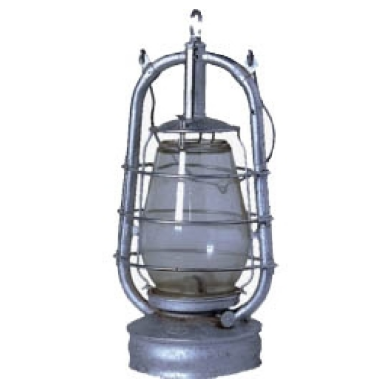

In [62]:
plt.imshow(plt.imread(img_fullpaths[-305]))
print(plt.imread(img_fullpaths[-305]).shape)
plt.axis("off")
plt.show()